In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

## Lecture et affichage du dataset

In [97]:
data = pd.read_csv("card_transdata.csv")
data.head(50)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [106]:
# define dataset
import sklearn
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

NameError: name 'make_classification' is not defined

In [104]:
dffraud0 = data.copy()
dffraud0.astype('int64') #ser.astype('category')

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    0
999999    0
Name: fraud, Length: 1000000, dtype: int64

In [102]:
dffraud0

[0         0
 1         0
 2         0
 3         0
 4         0
          ..
 999995    0
 999996    0
 999997    0
 999998    0
 999999    0
 Name: fraud, Length: 1000000, dtype: int64]

In [92]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


## dimensions des variables

In [63]:
data.shape

(1000000, 8)

Le dataset conitient 1000000 d'individus et 8 variables

## Affichage des colonnes

In [64]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

Le dataset contient 7 descripteurs et la cible qui est "fraud"

## Type de variables

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [66]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualisation des valeurs nulles

In [67]:
data.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Le dataset ne contient pas de valeurs nulles

Visualisation de la cible

In [68]:
data.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

C:\Users\npawi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud', ylabel='count'>

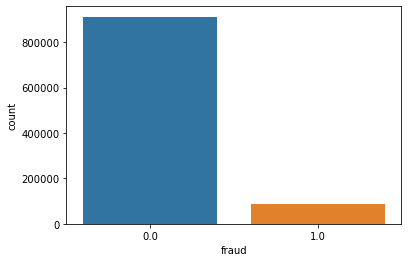

In [69]:
#Visualisation de la cible
sns.countplot('fraud',data=data)

On remarque que le nombre de fraud avoisinne les 9%

In [11]:
data.online_order.value_counts()

1.0    650552
0.0    349448
Name: online_order, dtype: int64

In [12]:
a = np.logical_and(data["fraud"], data["online_order"])
# a.head(50)

In [13]:
np.logical_and(data["fraud"], data["online_order"]).value_counts(True)

False    0.917289
True     0.082711
dtype: float64

In [14]:
T= 87403 - 82711
T

4692

In [15]:
P =  82711*100/87403
P

94.63176321178906

In [16]:
used_pin = np.logical_and(data["used_pin_number"], data["online_order"])
used_pin.head(50)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37     True
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [17]:
np.logical_and(data["used_pin_number"], data["online_order"]).value_counts(True)

False    0.934591
True     0.065409
dtype: float64

In [18]:
np.logical_and(data["used_pin_number"], data["fraud"]).value_counts(True)

False    0.999727
True     0.000273
dtype: float64

In [19]:
np.logical_and(data["used_chip"], data["fraud"]).value_counts(True)

False    0.97759
True     0.02241
dtype: float64

In [20]:
np.logical_and(data["repeat_retailer"], data["fraud"]).value_counts(True)

False    0.923075
True     0.076925
dtype: float64

In [21]:
np.logical_and(data["distance_from_home"], data["fraud"]).value_counts(True)

False    0.912597
True     0.087403
dtype: float64

In [22]:
np.logical_and(data["distance_from_home"] > 25, data["fraud"]).value_counts(True)

False    0.9642
True     0.0358
dtype: float64

In [23]:
np.logical_and(data["distance_from_home"] < 25, data["fraud"]).value_counts(True)

False    0.948397
True     0.051603
dtype: float64

## Visualisation des données aberrantes

C:\Users\npawi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance_from_home'>

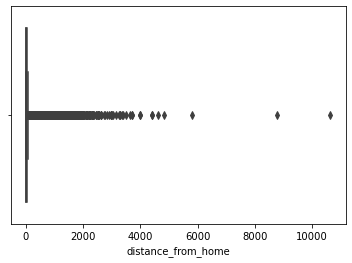

In [24]:
#Données aberrantes de la variable distance_from_home
sns.boxplot(data['distance_from_home'])

In [25]:
# Position of the Outlier
print(np.where(data['distance_from_home']>5000))

(array([266995, 326661, 847723], dtype=int64),)


In [26]:
colonnes = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']

C:\Users\npawi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratio_to_median_purchase_price'>

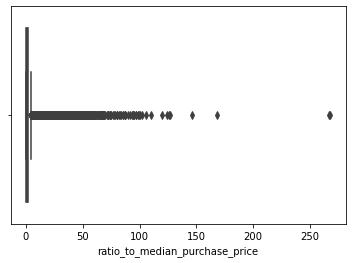

In [27]:
sns.boxplot(data['ratio_to_median_purchase_price'])

C:\Users\npawi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


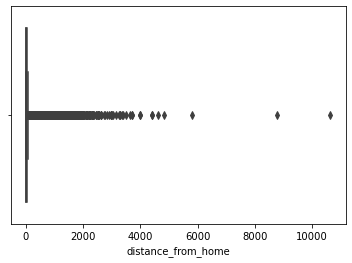

In [28]:
#Données aberrantes de la variable distance_from_home
sns.boxplot(data['distance_from_home'])
None

C:\Users\npawi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='repeat_retailer'>

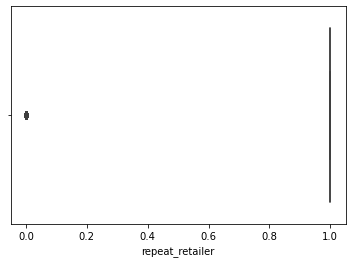

In [29]:
sns.boxplot(data['repeat_retailer'])

C:\Users\npawi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='used_chip'>

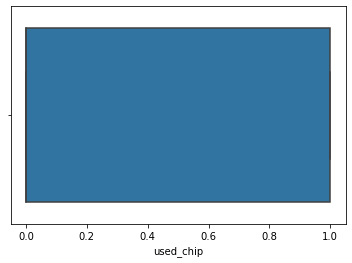

In [30]:
sns.boxplot(data['used_chip'])

C:\Users\npawi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='used_pin_number'>

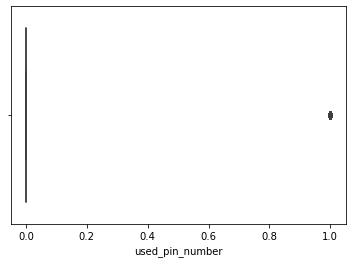

In [31]:
sns.boxplot(data['used_pin_number'])

C:\Users\npawi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order'>

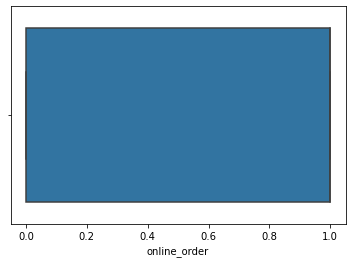

In [32]:
sns.boxplot(data['online_order'])

In [21]:
# for i in liste:
#     sns.boxplot(data[i])
# #     print(i)

In [22]:
colonnes = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']

# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
 
# Load the dataset
# bos_hou = load_boston()
 
# Create the dataframe
# column_name = colonnes
# data = pd.DataFrame(bos_hou.data)
# df_boston.columns = column_name
# df_boston.head()
 
''' Detection '''
# IQR
Q1 = np.percentile(data['distance_from_home'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['distance_from_home'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['distance_from_home'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['distance_from_home'] <= (Q1-1.5*IQR))

print(upper)
print(lower)
 
''' Removing the Outliers '''
# data.drop(upper[0], inplace = True)
# data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

Old Shape:  (1000000, 8)
(array([    12,     15,     16, ..., 999924, 999941, 999961], dtype=int64),)
(array([], dtype=int64),)
New Shape:  (1000000, 8)


In [33]:
a = 61682+834687
a

896369

In [34]:
colonnes = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']
E1 = data.fraud.value_counts().sort_values()
display(E1)

1.0     87403
0.0    912597
Name: fraud, dtype: int64

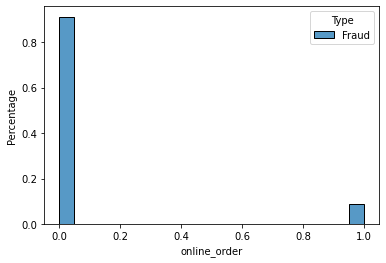

In [37]:
#Gender vs Fraud
ax=sns.histplot(x='fraud',data=data, stat='probability',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('online_order')
plt.legend(title='Type', labels=['Fraud'])

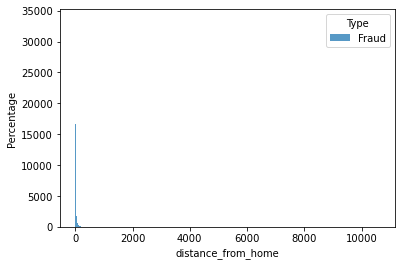

In [38]:
#distance_from_home vs Fraud
ax=sns.histplot(x='distance_from_home',data=data, stat='count',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('distance_from_home')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

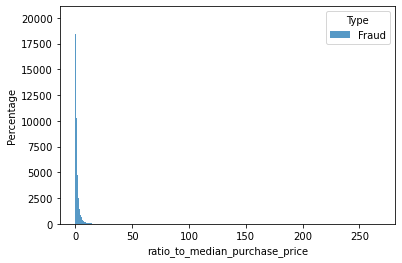

In [79]:
#distance_from_home vs Fraud
ax=sns.histplot(x='ratio_to_median_purchase_price',data=data, stat='count',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('ratio_to_median_purchase_price')
plt.legend(title='Type', labels=['Fraud'])

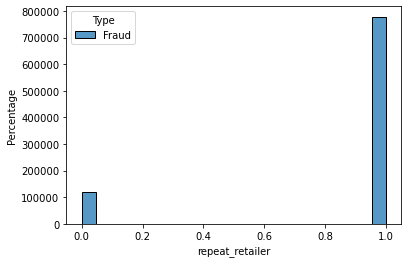

In [78]:
#distance_from_home vs Fraud
ax=sns.histplot(x='repeat_retailer',data=data, stat='count',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('repeat_retailer')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

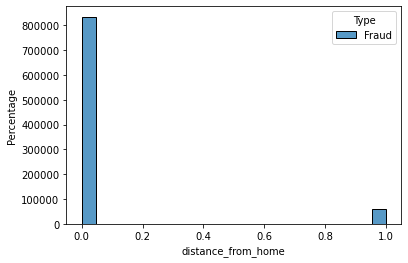

In [75]:
#distance_from_home vs Fraud
ax=sns.histplot(x='fraud',data=data, stat='count',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('distance_from_home')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

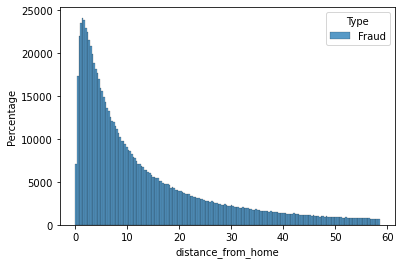

In [77]:
#distance_from_home vs Fraud
ax=sns.histplot(x='distance_from_home',data=data, stat='count',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('distance_from_home')
plt.legend(title='Type', labels=['Fraud'])

In [75]:
data1 = data.copy()

In [76]:
data1['Log_home'] = np.log10(data1['distance_from_home'])
data1['Log_trans'] = np.log10(data1['distance_from_last_transaction'])
data1['Log_ratio'] = np.log10(data1['ratio_to_median_purchase_price'])

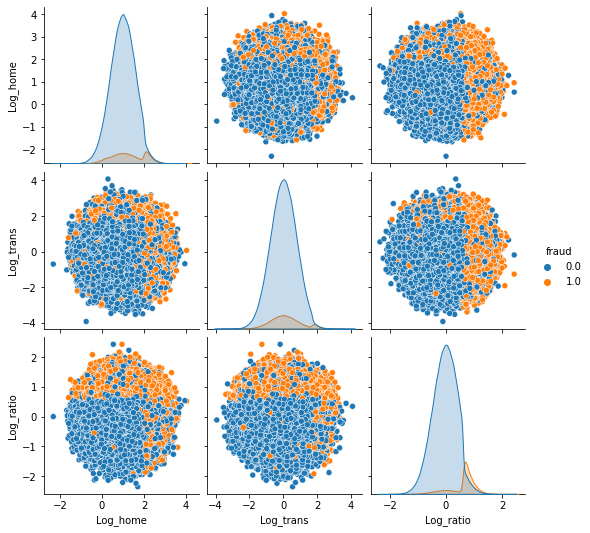

In [78]:
sns.pairplot(data=data1[['Log_home','Log_trans','Log_ratio','fraud']], hue = 'fraud')
plt.show()

In [ ]:
Les transactions frauduleuses sont bimodales tandisque les transactions non-frauduleurs unimodales.

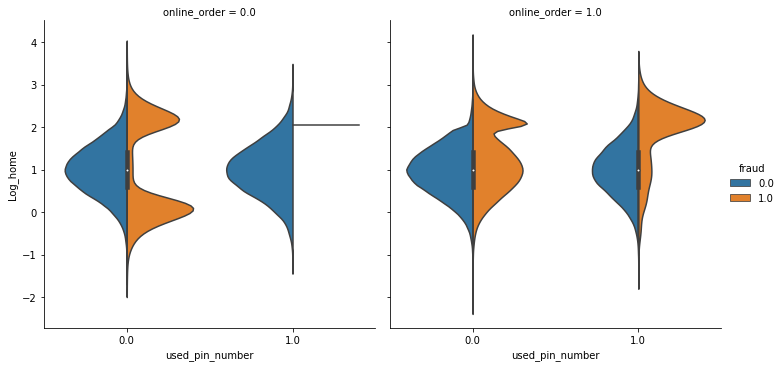

In [41]:
sns.catplot(data1=data1,x='used_pin_number',y='Log_home',hue='fraud',\
            col='online_order',kind="violin",split=True)
plt.show()

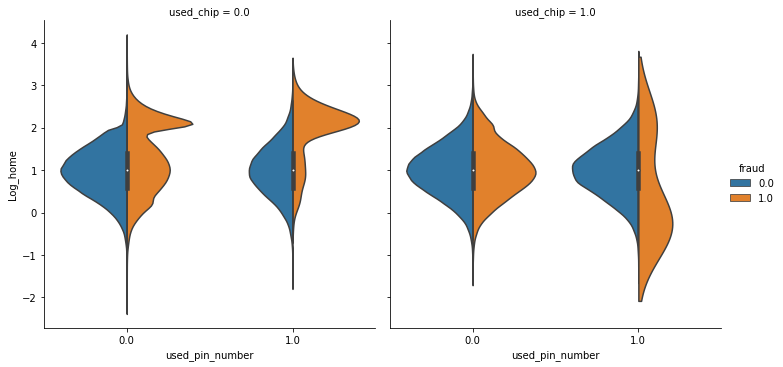

In [43]:
sns.catplot(data1=data1,x='used_pin_number',y='Log_home',hue='fraud',\
            col='used_chip',kind="violin",split=True)
plt.show()

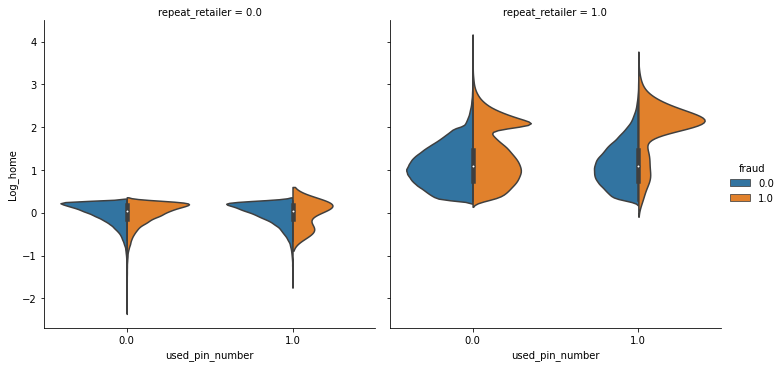

In [44]:
sns.catplot(data1=data1,x='used_pin_number',y='Log_home',hue='fraud',\
            col='repeat_retailer',kind="violin",split=True)
plt.show()

<AxesSubplot:xlabel='repeat_retailer', ylabel='count'>

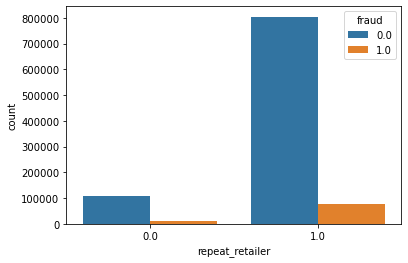

In [45]:
# plt.subplots(figsize=(20, 12))
# plt.xticks(rotation = '1')
sns.countplot(x='repeat_retailer', hue= 'fraud', data = data)

In [55]:
sns.countplot(data1=data1, x="fraud", hue="used_chip")

ValueError: Could not interpret input 'fraud'

In [47]:
data.used_chip.value_counts()

0.0    649601
1.0    350399
Name: used_chip, dtype: int64

### Réalisation de la standardisation des données en vue d’une analyse ACP

In [48]:
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [51]:
df = data.copy()
df1 =df.iloc[:,:-1]
df1

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [56]:
scaler = preprocessing.StandardScaler()
data_std = scaler.fit_transform(df1)
data_std

array([[ 0.47788202, -0.18284892,  0.04349141, ...,  1.36157608,
        -0.33445812, -1.36442519],
       [-0.24160679, -0.18809398, -0.18930045, ..., -0.73444298,
        -0.33445812, -1.36442519],
       [-0.3293694 , -0.16373307, -0.49881185, ..., -0.73444298,
        -0.33445812,  0.73290937],
       ...,
       [-0.36264968, -0.13790278, -0.57369398, ...,  1.36157608,
        -0.33445812,  0.73290937],
       [-0.34209827, -0.1855234 , -0.48162807, ..., -0.73444298,
        -0.33445812,  0.73290937],
       [ 0.48140344, -0.18257921, -0.51338354, ...,  1.36157608,
        -0.33445812,  0.73290937]])

### Vérifiez que la moyenne est nulle et l’écart type égal à 1.(Centré et réduit)

In [57]:
# Vérification que  la moyenne est nulle
print(np.mean(data_std, axis=0))
# Vérification que l'ecart-type est egal a 1
print(np.std(data_std, axis=0))

[ 2.27416308e-16  6.13402662e-17 -2.63375100e-16 -1.06048503e-17
 -3.48645557e-17 -8.49098569e-18 -9.10933551e-17]
[1. 1. 1. 1. 1. 1. 1.]


### Déterminez la matrice de corrélation

In [59]:
corr = np.corrcoef(data_std.transpose())
corr

array([[ 1.00000000e+00,  1.92828335e-04, -1.37417918e-03,
         1.43124256e-01, -6.97067124e-04, -1.62218616e-03,
        -1.30112828e-03],
       [ 1.92828335e-04,  1.00000000e+00,  1.01252558e-03,
        -9.28232497e-04,  2.05485576e-03, -8.98643576e-04,
         1.40893152e-04],
       [-1.37417918e-03,  1.01252558e-03,  1.00000000e+00,
         1.37382191e-03,  5.86578668e-04,  9.42204554e-04,
        -3.29814470e-04],
       [ 1.43124256e-01, -9.28232497e-04,  1.37382191e-03,
         1.00000000e+00, -1.34477663e-03, -4.17390572e-04,
        -5.32243090e-04],
       [-6.97067124e-04,  2.05485576e-03,  5.86578668e-04,
        -1.34477663e-03,  1.00000000e+00, -1.39318817e-03,
        -2.18792659e-04],
       [-1.62218616e-03, -8.98643576e-04,  9.42204554e-04,
        -4.17390572e-04, -1.39318817e-03,  1.00000000e+00,
        -2.90993824e-04],
       [-1.30112828e-03,  1.40893152e-04, -3.29814470e-04,
        -5.32243090e-04, -2.18792659e-04, -2.90993824e-04,
         1.0000000

### Visualisation de la Correlation avec la carte de chaleur

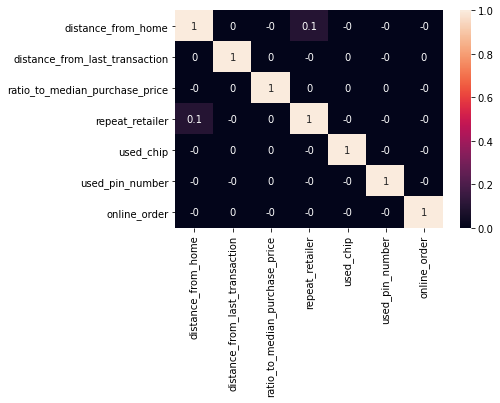

In [60]:
sns.heatmap(data=df1.corr().round(1), annot=True)
None

In [81]:
!pip install imbalanced-learn --user

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [83]:
# check version number
import imblearn
print(imblearn.__version__)

ModuleNotFoundError: No module named 'imblearn'